<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

Train Data

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r5/2-fft-normal-n-0-3-r5.csv?token=AKVFSOFRBGP2XHRCES2FX4C6ZLN4I')
print(df.shape)
df

(34529, 30)


,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,80,4,2,4,1,1,5,17,23,7,0,0,1,4,2,0.50,12,5,1,5,5,25,8,4,4,4,20,85,100,1
1,81,4,2,4,2,2,5,17,23,7,0,0,1,4,2,0.50,13,4,2,5,8,40,8,8,16,16,20,85,100,1
2,82,4,2,4,3,2,5,17,23,7,0,0,1,4,2,0.50,14,3,3,5,9,45,8,12,24,24,20,85,100,1
3,83,4,2,4,4,2,5,17,23,7,0,0,1,4,2,0.50,15,2,4,5,8,40,8,16,32,32,20,85,100,1
4,87,4,2,4,5,3,5,17,23,7,0,0,1,4,2,0.50,19,1,5,5,5,25,8,20,60,60,20,85,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34524,3268887,2,4,4,1,1,5,17,20,4,3,3,20043,4,1,0.25,9,1,1,1,1,1,8,4,4,80172,20,85,100,1
34525,3268888,2,4,4,2,2,5,17,20,4,3,3,20043,4,1,0.25,10,1,1,1,1,1,8,8,16,320688,20,85,100,1
34526,3268889,2,4,4,3,2,5,17,20,4,3,3,20043,4,1,0.25,11,1,1,1,1,1,8,12,24,481032,20,85,100,1
34527,3268890,2,4,4,4,2,5,17,20,4,3,3,20043,4,1,0.25,12,1,1,1,1,1,8,16,32,641376,20,85,100,1


In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r5/2-fft-malicious-n-0-3-m-1-r5.csv?token=AKVFSOCVIL6VXZIHO2B2TUS6ZLOBC', nrows=50000)
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r5/2-fft-malicious-n-0-3-m-6-r5.csv?token=AKVFSOCRIMKNOAE7V5IEBH26ZLOBG', nrows=50000)
df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r5/2-fft-malicious-n-0-3-m-9-r5.csv?token=AKVFSOG6GR4MRQXC7TE7EJC6ZLOBI', nrows=50000)
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r5/2-fft-malicious-n-0-3-m-14-r5.csv?token=AKVFSOAYTAYPV4TI752235K6ZLOBM', nrows=50000)

df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r5/2-fft-normal-n-0-5-r5.csv?token=AKVFSOGVV3XOAPLROLASAL26ZLOGC')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r5/2-fft-normal-n-0-12-r5.csv?token=AKVFSOGW4LL27XGYMBK4LUC6ZLOGG')
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r5/2-fft-normal-n-0-15-r5.csv?token=AKVFSOBNX22TYJ6LO3JBEAS6ZLOGM')

In [0]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df11.shape)
print(df12.shape)
print(df13.shape)

(50000, 30)
(50000, 30)
(50000, 30)
(50000, 30)
(83193, 30)
(31862, 30)
(34357, 30)


In [0]:
df = df.append(df1, ignore_index=True,sort=False)
df = df.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)
df = df.append(df13, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [0]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,7,2,0,1,1,4,3,9,5,5,23,7,2,2,0,0.0,4,12,1,12,12,144,0,1,4,8,3,27,9,1
1,62,0,2,4,1,1,5,17,23,7,5,5,2,2,2,1.0,12,11,2,12,22,264,0,4,4,8,20,85,100,1
2,63,0,2,4,2,2,5,17,23,7,5,5,2,2,2,1.0,13,10,3,12,30,360,0,8,16,32,20,85,100,1
3,64,0,2,4,3,2,5,17,23,7,5,5,2,2,2,1.0,14,9,4,12,36,432,0,12,24,48,20,85,100,1
4,65,0,2,4,4,2,5,17,23,7,5,5,2,2,2,1.0,15,8,5,12,40,480,0,16,32,64,20,85,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383936,3275371,2,4,4,1,1,5,17,20,4,15,15,20058,5,1,0.2,9,1,1,1,1,1,8,4,4,80232,20,85,100,1
383937,3275372,2,4,4,2,2,5,17,20,4,15,15,20058,5,1,0.2,10,1,1,1,1,1,8,8,16,320928,20,85,100,1
383938,3275373,2,4,4,3,2,5,17,20,4,15,15,20058,5,1,0.2,11,1,1,1,1,1,8,12,24,481392,20,85,100,1
383939,3275374,2,4,4,4,2,5,17,20,4,15,15,20058,5,1,0.2,12,1,1,1,1,1,8,16,32,641856,20,85,100,1


In [0]:
df.shape

(383941, 30)

Test Data

In [0]:
df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r5/2-fft-malicious-n-0-3-m-2-r5.csv?token=AKVFSOCJHCPVN6XMKX2G5NK6ZLOM2', nrows=30000)
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r5/2-fft-malicious-n-0-3-m-5-r5.csv?token=AKVFSODMTHIXHEMEUCX4JA26ZLOM6', nrows=30000)
df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r5/2-fft-malicious-n-0-3-m-10-r5.csv?token=AKVFSOHGBJKDQINBIX6LU626ZLONA', nrows=30000)
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r5/2-fft-malicious-n-0-3-m-12-r5.csv?token=AKVFSOH2F5JWVRW3AYVTT6C6ZLONE', nrows=30000)
df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r5/2-fft-malicious-n-0-3-m-13-r5.csv?token=AKVFSOBRFOJ62DKPXZLK6AK6ZLONG', nrows=30000)
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r5/2-fft-malicious-n-0-3-m-15-r5.csv?token=AKVFSOCFFDOFSGTMBD2WFB26ZLONK', nrows=30000)

df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r5/2-fft-normal-n-0-10-r5.csv?token=AKVFSOCH47THGP4WDRKZ7IK6ZLORK', nrows=30000)
print(df5.shape)
print(df6.shape)
print(df7.shape)
print(df8.shape)
print(df9.shape)
print(df10.shape)
print(df14.shape)

(30000, 30)
(30000, 30)
(30000, 30)
(30000, 30)
(30000, 30)
(30000, 30)
(30000, 30)


In [0]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,102,4,2,4,1,1,5,17,23,7,0,0,1,4,2,0.5,12,5,1,5,5,25,8,4,4,4,20,85,100,0
1,103,4,2,4,2,2,5,17,23,7,0,0,1,4,2,0.5,13,4,2,5,8,40,8,8,16,16,20,85,100,0
2,104,4,2,4,3,2,5,17,23,7,0,0,1,4,2,0.5,14,3,3,5,9,45,8,12,24,24,20,85,100,0
3,105,4,2,4,4,2,5,17,23,7,0,0,1,4,2,0.5,15,2,4,5,8,40,8,16,32,32,20,85,100,0
4,109,4,2,4,5,3,5,17,23,7,0,0,1,4,2,0.5,19,1,5,5,5,25,8,20,60,60,20,85,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1917845,2,0,2,1,4,3,9,21,5,23,7,16042,2,0,0.0,32,1,1,1,1,1,0,2,8,128336,6,27,18,0
29996,1917846,2,0,7,1,4,3,10,21,5,2,2,16040,2,0,0.0,6,1,1,1,1,1,0,7,28,449120,21,30,63,0
29997,1917902,0,2,3,1,4,3,9,23,7,21,5,16042,2,2,1.0,16,1,1,1,1,1,0,3,12,192504,9,27,27,0
29998,1918198,1,3,5,1,1,3,9,0,0,29,13,16046,4,2,0.5,12,1,1,1,1,1,3,5,5,80230,15,27,45,0


In [0]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [0]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.151395,-0.030466,-0.006324,0.009523,0.175540,0.186041,-0.025941,0.353465,-0.125678,-0.449021,-0.193345,-0.094895,-0.009207,-0.065758,-0.044286,-0.033002,0.576414,-0.034989,-0.021952,-0.030628,0.116904,0.180433,0.166337,-0.065222
inport,-0.151395,1.000000,-0.159626,-0.013108,0.019704,0.252936,0.178574,-0.013231,0.264011,0.113321,0.175148,-0.172608,-0.073411,-0.141424,-0.135705,-0.107493,-0.086799,0.650687,-0.079767,-0.064214,-0.051118,0.076240,0.223844,0.196127,-0.245997
cache_coherence_type,-0.030466,-0.159626,1.000000,0.218390,-0.328437,-0.219757,-0.231793,0.053025,-0.086982,-0.107642,-0.111316,-0.146414,0.066875,-0.011833,0.034769,0.038531,0.038622,-0.163681,0.456129,0.380879,0.300297,0.620019,-0.225429,0.153705,0.017987
flit_id,-0.006324,-0.013108,0.218390,1.000000,-0.035709,0.249211,0.239514,0.010090,0.061753,0.029705,-0.000700,0.383774,-0.051549,0.103983,0.033121,0.034879,0.022172,-0.028267,0.947872,0.900108,0.646693,0.374431,0.246213,0.334598,-0.004627
flit_type,0.009523,0.019704,-0.328437,-0.035709,1.000000,-0.374793,-0.360209,-0.015217,-0.092864,-0.044665,0.001046,0.308520,-0.093816,0.073418,-0.012886,-0.029672,-0.018076,0.042512,-0.089070,0.185849,0.129655,-0.563110,-0.370284,-0.503207,0.006976
vnet,0.175540,0.252936,-0.219757,0.249211,-0.374793,1.000000,0.984679,-0.061504,0.278456,0.153440,0.138220,-0.401536,-0.028288,-0.001193,-0.018622,-0.020236,-0.034186,0.345935,0.051364,-0.009289,-0.047730,0.629154,0.997500,0.930184,-0.065755
vc,0.186041,0.178574,-0.231793,0.239514,-0.360209,0.984679,1.000000,-0.062879,0.239632,0.080162,0.066134,-0.387901,-0.023345,0.025340,0.001260,-0.002397,-0.018530,0.293507,0.043951,-0.014817,-0.053786,0.607243,0.994530,0.910137,-0.047357
traversal_id,-0.025941,-0.013231,0.053025,0.010090,-0.015217,-0.061504,-0.062879,1.000000,0.012727,0.023633,0.003172,0.070827,-0.043542,-0.043513,-0.054991,-0.040296,-0.031590,-0.030454,0.030391,0.023230,0.550663,-0.007216,-0.062296,-0.042343,-0.144220
hop_count,0.353465,0.264011,-0.086982,0.061753,-0.092864,0.278456,0.239632,0.012727,1.000000,0.459669,-0.078184,0.026414,-0.156401,-0.129009,-0.180285,-0.135536,-0.105125,0.469195,-0.005614,-0.016407,-0.006174,0.154644,0.263792,0.249311,-0.051476
current_hop,-0.125678,0.113321,-0.107642,0.029705,-0.044665,0.153440,0.080162,0.023633,0.459669,1.000000,0.779271,0.273530,-0.019296,-0.090914,-0.069616,-0.063248,-0.053161,0.004183,-0.038276,-0.035684,-0.015516,0.037639,0.124399,0.114911,-0.026250


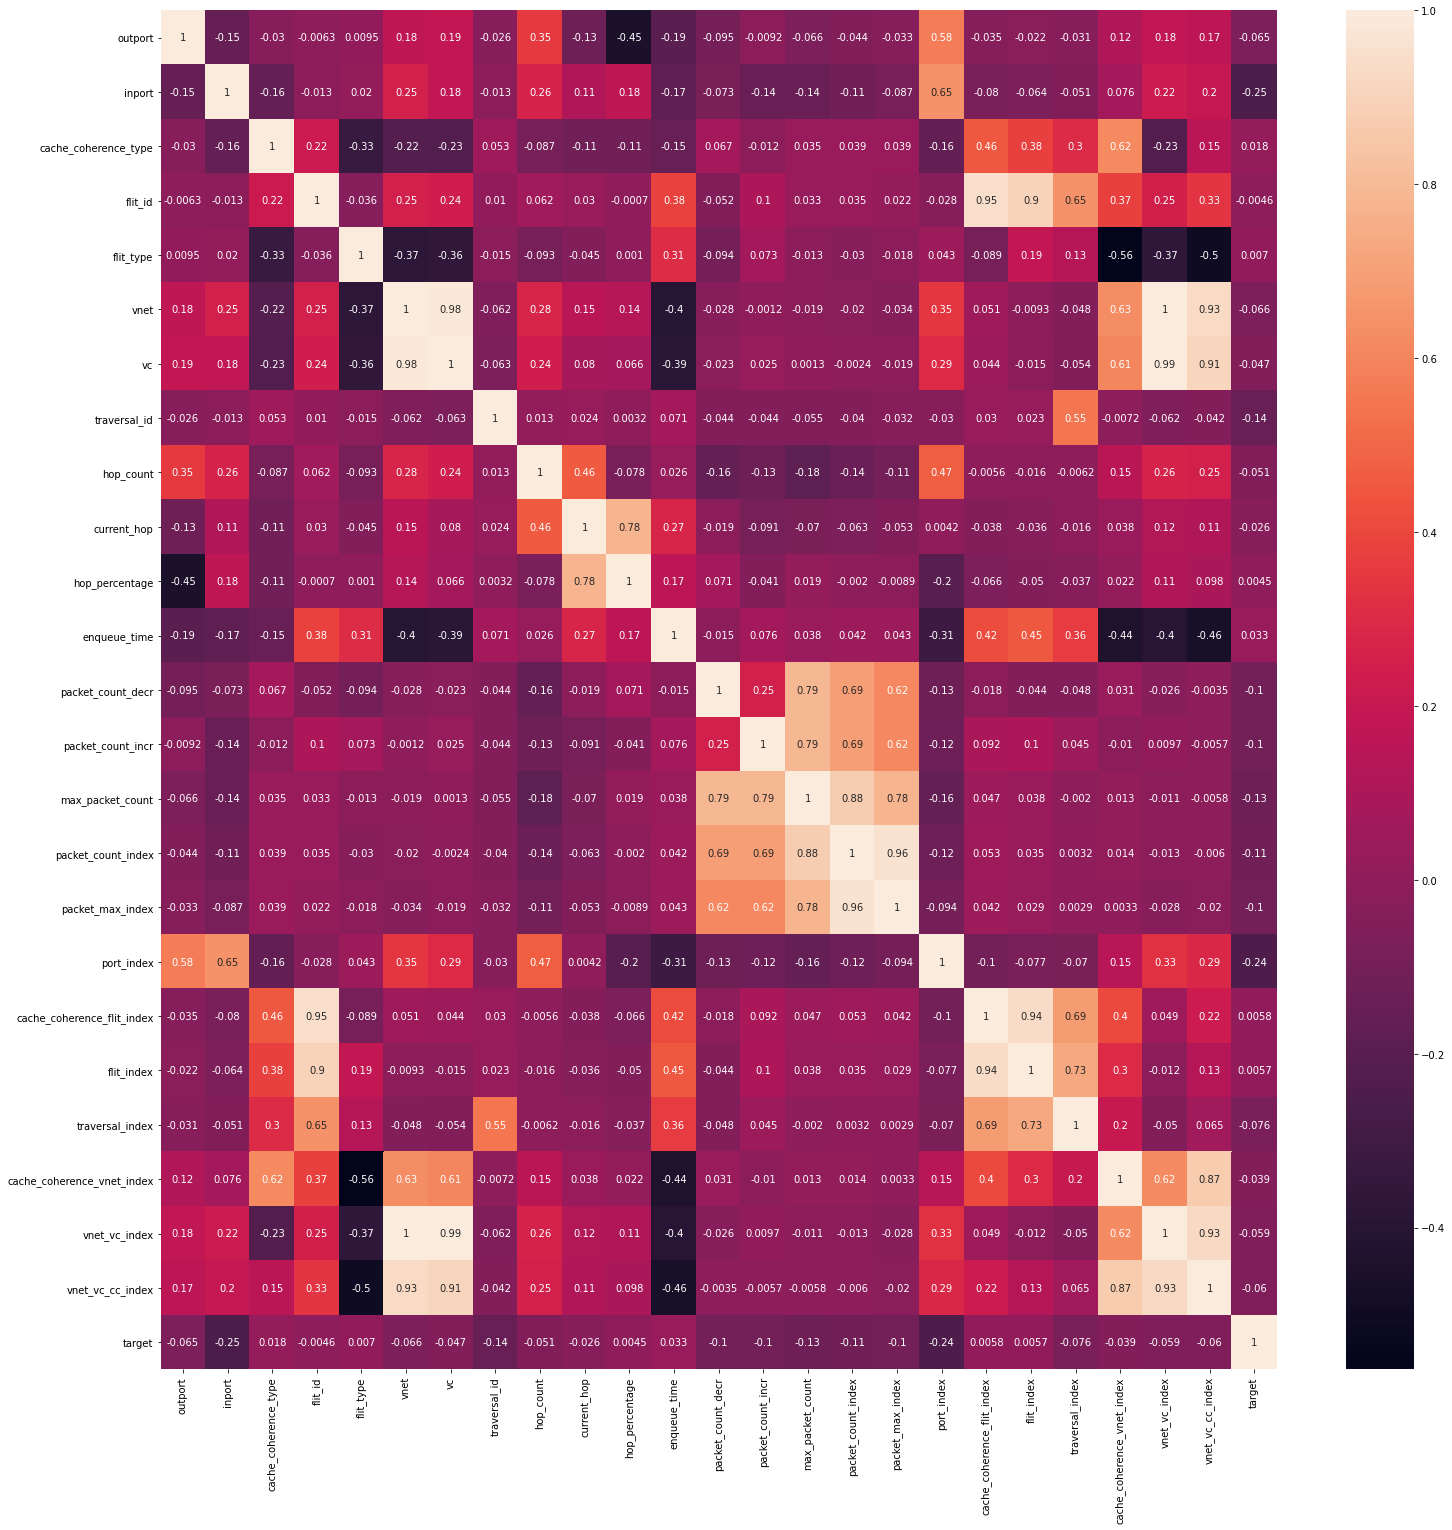

In [0]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,2,0,1,1,4,3,9,2,2,0,0.0,4,12,1,12,12,144,0,1,4,8,3,27,9
1,0,2,4,1,1,5,17,2,2,2,1.0,12,11,2,12,22,264,0,4,4,8,20,85,100
2,0,2,4,2,2,5,17,2,2,2,1.0,13,10,3,12,30,360,0,8,16,32,20,85,100
3,0,2,4,3,2,5,17,2,2,2,1.0,14,9,4,12,36,432,0,12,24,48,20,85,100
4,0,2,4,4,2,5,17,2,2,2,1.0,15,8,5,12,40,480,0,16,32,64,20,85,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383936,2,4,4,1,1,5,17,20058,5,1,0.2,9,1,1,1,1,1,8,4,4,80232,20,85,100
383937,2,4,4,2,2,5,17,20058,5,1,0.2,10,1,1,1,1,1,8,8,16,320928,20,85,100
383938,2,4,4,3,2,5,17,20058,5,1,0.2,11,1,1,1,1,1,8,12,24,481392,20,85,100
383939,2,4,4,4,2,5,17,20058,5,1,0.2,12,1,1,1,1,1,8,16,32,641856,20,85,100


In [0]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.5,0.0,0.0,0.00,1.000000,0.0,0.000000,0.000036,0.4,0.00,0.0,0.000000,0.379310,0.000000,0.37931,0.046025,0.019864,0.000000,0.000000,0.000000,0.000002,0.000000,0.000000,0.0
1,0.0,0.5,0.5,0.00,0.000000,1.0,0.888889,0.000036,0.4,0.50,1.0,0.133333,0.344828,0.034483,0.37931,0.087866,0.036533,0.000000,0.103448,0.000000,0.000002,0.944444,0.920635,1.0
2,0.0,0.5,0.5,0.25,0.333333,1.0,0.888889,0.000036,0.4,0.50,1.0,0.150000,0.310345,0.068966,0.37931,0.121339,0.049868,0.000000,0.241379,0.139535,0.000011,0.944444,0.920635,1.0
3,0.0,0.5,0.5,0.50,0.333333,1.0,0.888889,0.000036,0.4,0.50,1.0,0.166667,0.275862,0.103448,0.37931,0.146444,0.059869,0.000000,0.379310,0.232558,0.000018,0.944444,0.920635,1.0
4,0.0,0.5,0.5,0.75,0.333333,1.0,0.888889,0.000036,0.4,0.50,1.0,0.183333,0.241379,0.137931,0.37931,0.163180,0.066537,0.000000,0.517241,0.325581,0.000024,0.944444,0.920635,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383936,0.5,1.0,0.5,0.00,0.000000,1.0,0.888889,0.720568,1.0,0.25,0.2,0.083333,0.000000,0.000000,0.00000,0.000000,0.000000,0.666667,0.103448,0.000000,0.032092,0.944444,0.920635,1.0
383937,0.5,1.0,0.5,0.25,0.333333,1.0,0.888889,0.720568,1.0,0.25,0.2,0.100000,0.000000,0.000000,0.00000,0.000000,0.000000,0.666667,0.241379,0.139535,0.128373,0.944444,0.920635,1.0
383938,0.5,1.0,0.5,0.50,0.333333,1.0,0.888889,0.720568,1.0,0.25,0.2,0.116667,0.000000,0.000000,0.00000,0.000000,0.000000,0.666667,0.379310,0.232558,0.192561,0.944444,0.920635,1.0
383939,0.5,1.0,0.5,0.75,0.333333,1.0,0.888889,0.720568,1.0,0.25,0.2,0.133333,0.000000,0.000000,0.00000,0.000000,0.000000,0.666667,0.517241,0.325581,0.256748,0.944444,0.920635,1.0


In [0]:
train_X[train_X.duplicated()].shape

(9701, 24)

In [0]:
test_X = df5.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y = df5['target']

In [0]:
#standardization
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
test_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1.00,0.50,0.500000,0.00,0.000000,1.0,0.888889,0.000000,0.666667,0.666667,0.5,0.133333,0.153846,0.000000,0.153846,0.020513,0.004536,0.666667,0.103448,0.000000,0.000000,0.944444,0.920635,1.000000
1,1.00,0.50,0.500000,0.25,0.333333,1.0,0.888889,0.000000,0.666667,0.666667,0.5,0.150000,0.115385,0.038462,0.153846,0.035897,0.007371,0.666667,0.241379,0.139535,0.000008,0.944444,0.920635,1.000000
2,1.00,0.50,0.500000,0.50,0.333333,1.0,0.888889,0.000000,0.666667,0.666667,0.5,0.166667,0.076923,0.076923,0.153846,0.041026,0.008316,0.666667,0.379310,0.232558,0.000014,0.944444,0.920635,1.000000
3,1.00,0.50,0.500000,0.75,0.333333,1.0,0.888889,0.000000,0.666667,0.666667,0.5,0.183333,0.038462,0.115385,0.153846,0.035897,0.007371,0.666667,0.517241,0.325581,0.000019,0.944444,0.920635,1.000000
4,1.00,0.50,0.500000,1.00,0.666667,1.0,0.888889,0.000000,0.666667,0.666667,0.5,0.250000,0.000000,0.153846,0.153846,0.020513,0.004536,0.666667,0.655172,0.651163,0.000039,0.944444,0.920635,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.50,0.00,0.166667,0.00,1.000000,0.0,0.000000,0.999751,0.000000,0.000000,0.0,0.466667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034483,0.046512,0.088897,0.166667,0.000000,0.098901
29996,0.50,0.00,1.000000,0.00,1.000000,0.0,0.111111,0.999626,0.000000,0.000000,0.0,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.206897,0.279070,0.311109,1.000000,0.047619,0.593407
29997,0.00,0.50,0.333333,0.00,1.000000,0.0,0.000000,0.999751,0.000000,0.666667,1.0,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068966,0.093023,0.133348,0.333333,0.000000,0.197802
29998,0.25,0.75,0.666667,0.00,0.000000,0.0,0.000000,1.000000,0.666667,0.666667,0.5,0.133333,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.137931,0.011628,0.055574,0.666667,0.000000,0.395604


In [0]:
test_X[test_X.duplicated()].shape

(0, 24)

In [0]:
test_X1 = df6.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y1 = df6['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)
test_X1

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.5,0.0,0.000000,0.00,1.000000,0.0,0.000000,0.000235,0.4,0.00,0.00,0.000000,0.166667,0.000000,0.166667,0.019608,0.004411,0.000000,0.000000,0.000000,0.000010,0.000000,0.000000,0.000000
1,0.0,0.5,0.500000,0.00,0.000000,1.0,0.888889,0.000235,0.4,0.50,1.00,0.131148,0.133333,0.033333,0.166667,0.035294,0.007435,0.000000,0.103448,0.000000,0.000010,0.944444,0.920635,1.000000
2,0.0,0.5,0.500000,0.25,0.333333,1.0,0.888889,0.000235,0.4,0.50,1.00,0.147541,0.100000,0.066667,0.166667,0.043137,0.008948,0.000000,0.241379,0.139535,0.000058,0.944444,0.920635,1.000000
3,0.0,0.5,0.500000,0.50,0.333333,1.0,0.888889,0.000235,0.4,0.50,1.00,0.163934,0.066667,0.100000,0.166667,0.043137,0.008948,0.000000,0.379310,0.232558,0.000089,0.944444,0.920635,1.000000
4,0.0,0.5,0.500000,0.75,0.333333,1.0,0.888889,0.000235,0.4,0.50,1.00,0.180328,0.033333,0.133333,0.166667,0.035294,0.007435,0.000000,0.517241,0.325581,0.000121,0.944444,0.920635,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.5,1.0,0.500000,0.25,0.333333,1.0,0.888889,1.000000,0.8,0.25,0.25,0.081967,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.241379,0.139535,0.178697,0.944444,0.920635,1.000000
29996,0.5,1.0,0.500000,0.50,0.333333,1.0,0.888889,1.000000,0.8,0.25,0.25,0.098361,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.379310,0.232558,0.268047,0.944444,0.920635,1.000000
29997,0.5,1.0,0.333333,0.00,1.000000,0.0,0.000000,1.000000,0.8,0.25,0.25,0.114754,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.068966,0.093023,0.134021,0.333333,0.000000,0.197802
29998,0.5,1.0,0.500000,0.75,0.333333,1.0,0.888889,1.000000,0.8,0.25,0.25,0.131148,0.033333,0.000000,0.033333,0.003922,0.000378,0.666667,0.517241,0.325581,0.357398,0.944444,0.920635,1.000000


In [0]:
test_X2 = df7.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y2 = df7['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)
test_X2

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1.0,0.5,0.500000,0.00,0.000000,1.0,0.888889,0.000000,0.666667,0.666667,0.5,0.148148,0.137931,0.000000,0.137931,0.016736,0.003334,0.666667,0.103448,0.000000,0.000000,0.944444,0.920635,1.000000
1,1.0,0.5,0.500000,0.25,0.333333,1.0,0.888889,0.000000,0.666667,0.666667,0.5,0.166667,0.103448,0.034483,0.137931,0.029289,0.005417,0.666667,0.241379,0.139535,0.000009,0.944444,0.920635,1.000000
2,1.0,0.5,0.500000,0.50,0.333333,1.0,0.888889,0.000000,0.666667,0.666667,0.5,0.185185,0.068966,0.068966,0.137931,0.033473,0.006112,0.666667,0.379310,0.232558,0.000014,0.944444,0.920635,1.000000
3,1.0,0.5,0.500000,0.75,0.333333,1.0,0.888889,0.000000,0.666667,0.666667,0.5,0.203704,0.034483,0.103448,0.137931,0.029289,0.005417,0.666667,0.517241,0.325581,0.000020,0.944444,0.920635,1.000000
4,1.0,0.5,0.500000,1.00,0.666667,1.0,0.888889,0.000000,0.666667,0.666667,0.5,0.277778,0.000000,0.137931,0.137931,0.016736,0.003334,0.666667,0.655172,0.651163,0.000040,0.944444,0.920635,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.0,0.5,0.500000,1.00,0.666667,1.0,0.888889,0.999553,0.666667,0.666667,0.5,0.277778,0.034483,0.172414,0.206897,0.046025,0.011529,0.666667,0.655172,0.651163,0.666708,0.944444,0.920635,1.000000
29996,0.0,0.5,0.333333,0.00,1.000000,0.0,0.000000,0.999617,0.000000,0.666667,1.0,0.148148,0.000000,0.206897,0.206897,0.025105,0.006668,0.000000,0.068966,0.093023,0.133348,0.333333,0.000000,0.197802
29997,1.0,0.5,1.000000,0.00,1.000000,0.0,0.000000,0.999936,0.666667,0.666667,0.5,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.206897,0.279070,0.311248,1.000000,0.000000,0.593407
29998,1.0,0.5,0.500000,0.00,0.000000,1.0,0.888889,1.000000,0.666667,0.666667,0.5,0.148148,0.137931,0.000000,0.137931,0.016736,0.003334,0.666667,0.103448,0.000000,0.044464,0.944444,0.920635,1.000000


In [0]:
test_X3 = df8.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y3 = df8['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)
test_X3

(11, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1.0,0.50,0.500000,0.00,0.000000,1.0,0.888889,0.000000,0.666667,0.666667,0.50,0.135593,0.129032,0.000000,0.129032,0.01476,0.002758,0.666667,0.103448,0.000000,0.000000,0.944444,0.920635,1.000000
1,1.0,0.50,0.500000,0.25,0.333333,1.0,0.888889,0.000000,0.666667,0.666667,0.50,0.152542,0.096774,0.032258,0.129032,0.02583,0.004481,0.666667,0.241379,0.139535,0.000008,0.944444,0.920635,1.000000
2,1.0,0.50,0.500000,0.50,0.333333,1.0,0.888889,0.000000,0.666667,0.666667,0.50,0.169492,0.064516,0.064516,0.129032,0.02952,0.005056,0.666667,0.379310,0.232558,0.000013,0.944444,0.920635,1.000000
3,1.0,0.50,0.500000,0.75,0.333333,1.0,0.888889,0.000000,0.666667,0.666667,0.50,0.186441,0.032258,0.096774,0.129032,0.02583,0.004481,0.666667,0.517241,0.325581,0.000018,0.944444,0.920635,1.000000
4,1.0,0.50,0.500000,1.00,0.666667,1.0,0.888889,0.000000,0.666667,0.666667,0.50,0.254237,0.000000,0.129032,0.129032,0.01476,0.002758,0.666667,0.655172,0.651163,0.000036,0.944444,0.920635,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.5,1.00,0.500000,1.00,0.666667,1.0,0.888889,0.999941,0.666667,0.333333,0.25,0.203390,0.000000,0.000000,0.000000,0.00000,0.000000,0.666667,0.655172,0.651163,0.666783,0.944444,0.920635,1.000000
29996,0.0,0.75,0.666667,0.00,0.000000,0.0,0.000000,1.000000,0.000000,0.666667,1.00,0.135593,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.137931,0.011628,0.055566,0.666667,0.000000,0.395604
29997,0.0,0.75,0.666667,0.25,0.333333,0.0,0.000000,1.000000,0.000000,0.666667,1.00,0.254237,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.310345,0.186047,0.222272,0.666667,0.000000,0.395604
29998,0.0,0.75,0.666667,0.50,0.333333,0.0,0.000000,1.000000,0.000000,0.666667,1.00,0.372881,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.482759,0.302326,0.333410,0.666667,0.000000,0.395604


In [0]:
test_X4 = df9.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y4 = df9['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)
test_X4

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.25,0.5,0.5,0.00,0.000000,1.0,0.888889,0.000147,0.666667,0.666667,0.5,0.135593,0.142857,0.000000,0.142857,0.017857,0.003679,0.166667,0.103448,0.000000,0.000007,0.944444,0.920635,1.0
1,0.25,0.5,0.5,0.25,0.333333,1.0,0.888889,0.000147,0.666667,0.666667,0.5,0.152542,0.107143,0.035714,0.142857,0.031250,0.005978,0.166667,0.241379,0.139535,0.000036,0.944444,0.920635,1.0
2,0.25,0.5,0.5,0.50,0.333333,1.0,0.888889,0.000147,0.666667,0.666667,0.5,0.169492,0.071429,0.071429,0.142857,0.035714,0.006744,0.166667,0.379310,0.232558,0.000056,0.944444,0.920635,1.0
3,0.25,0.5,0.5,0.75,0.333333,1.0,0.888889,0.000147,0.666667,0.666667,0.5,0.186441,0.035714,0.107143,0.142857,0.031250,0.005978,0.166667,0.517241,0.325581,0.000075,0.944444,0.920635,1.0
4,0.25,0.5,0.5,1.00,0.666667,1.0,0.888889,0.000147,0.666667,0.666667,0.5,0.254237,0.000000,0.142857,0.142857,0.017857,0.003679,0.166667,0.655172,0.651163,0.000144,0.944444,0.920635,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.00,0.5,0.5,0.00,0.000000,1.0,0.888889,1.000000,0.666667,0.666667,0.5,0.135593,0.178571,0.000000,0.178571,0.022321,0.005365,0.666667,0.103448,0.000000,0.044445,0.944444,0.920635,1.0
29996,1.00,0.5,0.5,0.25,0.333333,1.0,0.888889,1.000000,0.666667,0.666667,0.5,0.152542,0.142857,0.035714,0.178571,0.040179,0.009044,0.666667,0.241379,0.139535,0.177788,0.944444,0.920635,1.0
29997,1.00,0.5,0.5,0.50,0.333333,1.0,0.888889,1.000000,0.666667,0.666667,0.5,0.169492,0.107143,0.071429,0.178571,0.049107,0.010883,0.666667,0.379310,0.232558,0.266684,0.944444,0.920635,1.0
29998,1.00,0.5,0.5,0.75,0.333333,1.0,0.888889,1.000000,0.666667,0.666667,0.5,0.186441,0.071429,0.107143,0.178571,0.049107,0.010883,0.666667,0.517241,0.325581,0.355580,0.944444,0.920635,1.0


In [0]:
test_X5 = df10.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y5 = df10['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)
test_X5

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1.00,0.50,0.500000,0.00,0.000000,1.0,0.888889,0.000000,0.666667,0.5,0.5,0.150943,0.137931,0.000000,0.137931,0.016736,0.003334,0.666667,0.103448,0.000000,0.000000,0.944444,0.920635,1.000000
1,1.00,0.50,0.500000,0.25,0.333333,1.0,0.888889,0.000000,0.666667,0.5,0.5,0.169811,0.103448,0.034483,0.137931,0.029289,0.005417,0.666667,0.241379,0.139535,0.000008,0.944444,0.920635,1.000000
2,1.00,0.50,0.500000,0.50,0.333333,1.0,0.888889,0.000000,0.666667,0.5,0.5,0.188679,0.068966,0.068966,0.137931,0.033473,0.006112,0.666667,0.379310,0.232558,0.000014,0.944444,0.920635,1.000000
3,1.00,0.50,0.500000,0.75,0.333333,1.0,0.888889,0.000000,0.666667,0.5,0.5,0.207547,0.034483,0.103448,0.137931,0.029289,0.005417,0.666667,0.517241,0.325581,0.000020,0.944444,0.920635,1.000000
4,1.00,0.50,0.500000,1.00,0.666667,1.0,0.888889,0.000000,0.666667,0.5,0.5,0.283019,0.000000,0.137931,0.137931,0.016736,0.003334,0.666667,0.655172,0.651163,0.000040,0.944444,0.920635,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.75,0.25,0.666667,0.25,0.333333,0.0,0.000000,0.999936,1.000000,1.0,0.8,0.433962,0.344828,0.275862,0.620690,0.410042,0.261147,0.250000,0.310345,0.186047,0.222248,0.666667,0.000000,0.395604
29996,0.75,0.25,0.666667,0.50,0.333333,0.0,0.000000,0.999936,1.000000,1.0,0.8,0.566038,0.310345,0.310345,0.620690,0.414226,0.263787,0.250000,0.482759,0.302326,0.333374,0.666667,0.000000,0.395604
29997,0.75,0.25,0.666667,0.75,0.333333,0.0,0.000000,0.999936,1.000000,1.0,0.8,0.698113,0.275862,0.344828,0.620690,0.410042,0.261147,0.250000,0.655172,0.418605,0.444499,0.666667,0.000000,0.395604
29998,0.75,0.25,0.666667,1.00,0.666667,0.0,0.000000,0.999936,1.000000,1.0,0.8,0.830189,0.241379,0.379310,0.620690,0.397490,0.253230,0.250000,0.827586,0.825581,0.833439,0.666667,0.000000,0.395604


In [0]:
test_X6 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y6 = df14['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)
test_X6

(12, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1.0,0.5,0.500000,0.00,0.000000,1.0,1.0,0.000000,1.0,1.0,0.500000,0.142857,0.222222,0.000000,0.222222,0.040404,0.012638,0.666667,0.103448,0.000000,0.000000,0.944444,1.0,1.000000
1,1.0,0.5,0.500000,0.25,0.333333,1.0,1.0,0.000000,1.0,1.0,0.500000,0.160714,0.166667,0.055556,0.222222,0.070707,0.020537,0.666667,0.241379,0.139535,0.000008,0.944444,1.0,1.000000
2,1.0,0.5,0.500000,0.50,0.333333,1.0,1.0,0.000000,1.0,1.0,0.500000,0.178571,0.111111,0.111111,0.222222,0.080808,0.023170,0.666667,0.379310,0.232558,0.000013,0.944444,1.0,1.000000
3,1.0,0.5,0.500000,0.75,0.333333,1.0,1.0,0.000000,1.0,1.0,0.500000,0.196429,0.055556,0.166667,0.222222,0.070707,0.020537,0.666667,0.517241,0.325581,0.000018,0.944444,1.0,1.000000
4,1.0,0.5,0.500000,1.00,0.666667,1.0,1.0,0.000000,1.0,1.0,0.500000,0.267857,0.000000,0.222222,0.222222,0.040404,0.012638,0.666667,0.655172,0.651163,0.000037,0.944444,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.0,0.5,0.333333,0.00,1.000000,0.0,0.0,0.999882,0.0,1.0,1.000000,0.178571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068966,0.093023,0.133339,0.333333,0.0,0.197802
29996,1.0,0.5,0.500000,0.50,0.333333,1.0,1.0,0.999882,1.0,1.0,0.500000,0.196429,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.379310,0.232558,0.266680,0.944444,1.0,1.000000
29997,1.0,0.5,0.500000,0.75,0.333333,1.0,1.0,0.999882,1.0,1.0,0.500000,0.214286,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.517241,0.325581,0.355575,0.944444,1.0,1.000000
29998,1.0,0.5,0.500000,1.00,0.666667,1.0,1.0,0.999882,1.0,1.0,0.500000,0.267857,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.655172,0.651163,0.666705,0.944444,1.0,1.000000


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [0]:
train_Y = df['target']
train_Y.value_counts()

0    200000
1    183941
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs        Score
17                  port_index  4626.040833
1                       inport  4036.713330
14            max_packet_count  1287.985522
7                 traversal_id   871.553268
5                         vnet   773.005790
13           packet_count_incr   657.623831
12           packet_count_decr   630.494902
15          packet_count_index   628.568984
22               vnet_vc_index   524.192222
16            packet_max_index   464.733169
6                           vc   302.961997
0                      outport   256.567678
20             traversal_index   256.106945
23            vnet_vc_cc_index   208.530846
8                    hop_count    58.521031
21  cache_coherence_vnet_index    46.213569
11                enqueue_time    39.221531


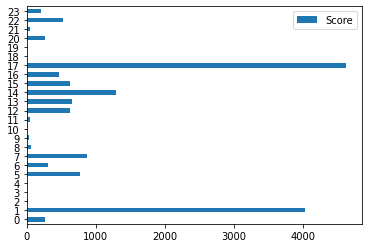

In [0]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [0]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 66.9479606188467
Test Prediction  67.04475901496309


In [0]:
y_pred_test = logreg.predict(test_X)
logreg_score_test = accuracy_score(test_Y,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  99.62666666666667


In [0]:
y_pred_test = logreg.predict(test_X1)
logreg_score_test = accuracy_score(test_Y1,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  54.88666666666666


In [0]:
y_pred_test = logreg.predict(test_X2)
logreg_score_test = accuracy_score(test_Y2,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  99.67333333333333


In [0]:
y_pred_test = logreg.predict(test_X3)
logreg_score_test = accuracy_score(test_Y3,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  99.15333333333334


In [0]:
y_pred_test = logreg.predict(test_X4)
logreg_score_test = accuracy_score(test_Y4,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  99.73666666666666


In [0]:
y_pred_test = logreg.predict(test_X5)
logreg_score_test = accuracy_score(test_Y5,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  89.5


In [0]:
y_pred_test = logreg.predict(test_X6)
logreg_score_test = accuracy_score(test_Y6,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  0.5599999999999999


In [0]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
8,hop_count,4.061810
10,hop_percentage,3.558719
15,packet_count_index,1.859174
18,cache_coherence_flit_index,1.723307
6,vc,0.619144
19,flit_index,0.103178
4,flit_type,0.055043
22,vnet_vc_index,-0.079078
2,cache_coherence_type,-0.296936
5,vnet,-0.297855


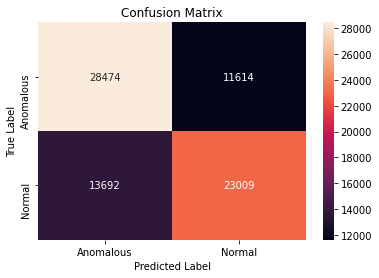

In [0]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.71      0.69     40088
           1       0.66      0.63      0.65     36701

    accuracy                           0.67     76789
   macro avg       0.67      0.67      0.67     76789
weighted avg       0.67      0.67      0.67     76789



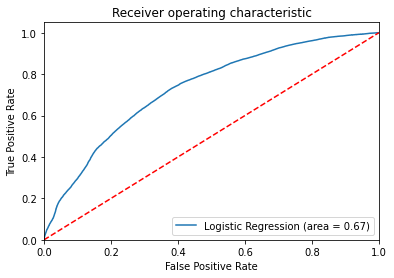

In [0]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

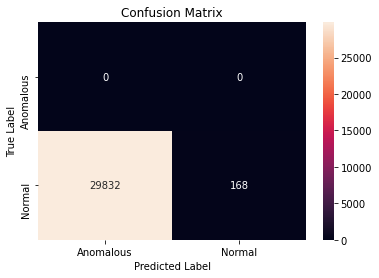

In [0]:
cm = confusion_matrix(test_Y6, y_pred_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y6, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.01      0.01     30000

    accuracy                           0.01     30000
   macro avg       0.50      0.00      0.01     30000
weighted avg       1.00      0.01      0.01     30000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighbors Classifier

In [0]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [0]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 90.469539511382
Test Prediction  85.28695516284884


In [0]:
y_pred_knn_test= knn.predict(test_X)
knn_score_test = accuracy_score(test_Y,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  71.57666666666667


In [0]:
y_pred_knn_test= knn.predict(test_X1)
knn_score_test = accuracy_score(test_Y1,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  31.28666666666667


In [0]:
y_pred_knn_test= knn.predict(test_X2)
knn_score_test = accuracy_score(test_Y2,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  74.45666666666668


In [0]:
y_pred_knn_test= knn.predict(test_X3)
knn_score_test = accuracy_score(test_Y3,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  52.42333333333333


In [0]:
y_pred_knn_test= knn.predict(test_X4)
knn_score_test = accuracy_score(test_Y4,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  79.98333333333333


In [0]:
y_pred_knn_test= knn.predict(test_X5)
knn_score_test = accuracy_score(test_Y5,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  51.623333333333335


In [0]:
y_pred_knn_test= knn.predict(test_X6)
knn_score_test = accuracy_score(test_Y6,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  35.60333333333333


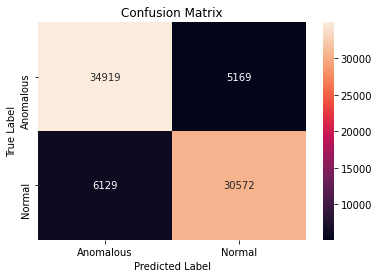

In [0]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86     40088
           1       0.86      0.83      0.84     36701

    accuracy                           0.85     76789
   macro avg       0.85      0.85      0.85     76789
weighted avg       0.85      0.85      0.85     76789



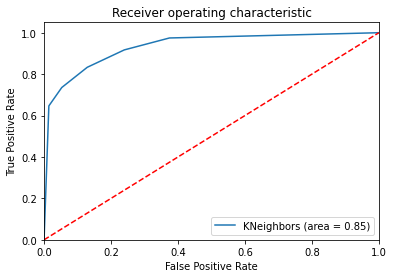

In [0]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

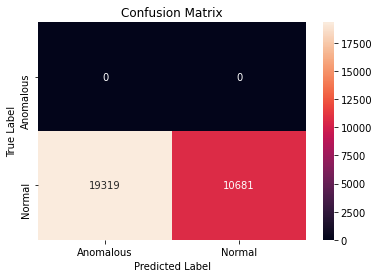

In [0]:
cm = confusion_matrix(test_Y6, y_pred_knn_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y6,y_pred_knn_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.36      0.53     30000

    accuracy                           0.36     30000
   macro avg       0.50      0.18      0.26     30000
weighted avg       1.00      0.36      0.53     30000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [0]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [0]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 65.47930666249935
Test Prediction Score 65.32185599499928


In [0]:
y_pred_nb_test= nb.predict(test_X)
nb_score_test = accuracy_score(test_Y,y_pred_nb_test)
print("Test Prediction Score",nb_score_test*100)

Test Prediction Score 61.55666666666667


In [0]:
y_pred_nb_test= nb.predict(test_X1)
nb_score_test = accuracy_score(test_Y1,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  42.68666666666667


In [0]:
y_pred_nb_test= nb.predict(test_X2)
nb_score_test = accuracy_score(test_Y2,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  57.616666666666674


In [0]:
y_pred_nb_test= nb.predict(test_X3)
nb_score_test = accuracy_score(test_Y3,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  44.42


In [0]:
y_pred_nb_test= nb.predict(test_X4)
nb_score_test = accuracy_score(test_Y4,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  54.96333333333333


In [0]:
y_pred_nb_test= nb.predict(test_X5)
nb_score_test = accuracy_score(test_Y5,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  56.35


In [0]:
y_pred_nb_test= nb.predict(test_X6)
nb_score_test = accuracy_score(test_Y6,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  60.79666666666667


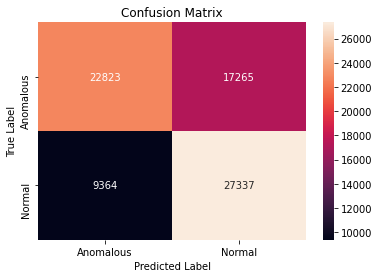

In [0]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.71      0.57      0.63     40088
           1       0.61      0.74      0.67     36701

    accuracy                           0.65     76789
   macro avg       0.66      0.66      0.65     76789
weighted avg       0.66      0.65      0.65     76789



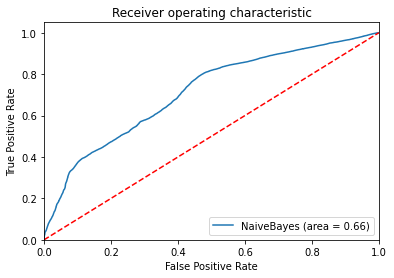

In [0]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [0]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

Using TensorFlow backend.


2-Layer Neural Network

In [0]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 245721 samples, validate on 61431 samples
Epoch 1/10
245721/245721 [==============================] - 10s 41us/step - loss: 0.2027 - accuracy: 0.6661 - val_loss: 0.1772 - val_accuracy: 0.7292
Epoch 2/10
245721/245721 [==============================] - 10s 40us/step - loss: 0.1722 - accuracy: 0.7389 - val_loss: 0.1701 - val_accuracy: 0.7405
Epoch 3/10
245721/245721 [==============================] - 10s 40us/step - loss: 0.1691 - accuracy: 0.7469 - val_loss: 0.1694 - val_accuracy: 0.7437
Epoch 4/10
245721/245721 [==============================] - 10s 40us/step - loss: 0.1684 - accuracy: 0.7490 - val_loss: 0.1684 - val_accuracy: 0.7465
Epoch 5/10
245721/245721 [==============================] - 10s 40us/step - loss: 0.1682 - accuracy: 0.7498 - val_loss: 0.1678 - val_accuracy: 0.7494
Epoch 6/10
245721/245721 [==============================] - 10s 40us/step - loss: 0.1679 - accuracy: 0.7501 - val_loss: 0.1680 - val_accuracy: 0.7486
Epoch 7/10
245721/245721 [=======================

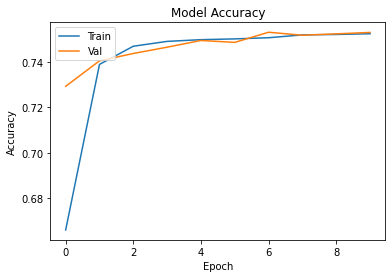

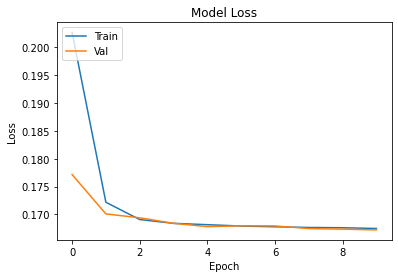

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 75.34%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 85.32%


In [0]:
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 39.55%


In [0]:
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 85.44%


In [0]:
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 64.44%


In [0]:
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 88.59%


In [0]:
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 72.16%


In [0]:
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 48.51%


3-Layer Neural Network

In [0]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2 )

Train on 245721 samples, validate on 61431 samples
Epoch 1/30
245721/245721 [==============================] - 10s 39us/step - loss: 0.2498 - accuracy: 0.5160 - val_loss: 0.2496 - val_accuracy: 0.5192
Epoch 2/30
245721/245721 [==============================] - 10s 40us/step - loss: 0.2496 - accuracy: 0.5201 - val_loss: 0.2496 - val_accuracy: 0.5200
Epoch 3/30
245721/245721 [==============================] - 10s 40us/step - loss: 0.2496 - accuracy: 0.5204 - val_loss: 0.2496 - val_accuracy: 0.5199
Epoch 4/30
245721/245721 [==============================] - 10s 40us/step - loss: 0.2496 - accuracy: 0.5204 - val_loss: 0.2496 - val_accuracy: 0.5199
Epoch 5/30
245721/245721 [==============================] - 10s 39us/step - loss: 0.2496 - accuracy: 0.5206 - val_loss: 0.2496 - val_accuracy: 0.5199
Epoch 6/30
245721/245721 [==============================] - 10s 40us/step - loss: 0.2496 - accuracy: 0.5206 - val_loss: 0.2496 - val_accuracy: 0.5200
Epoch 7/30
245721/245721 [=======================

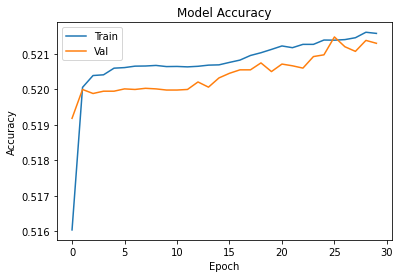

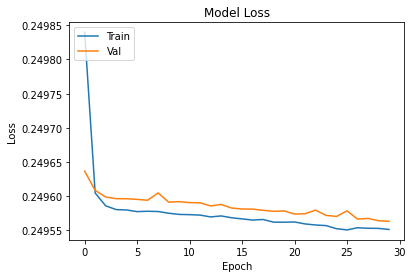

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 52.29%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 99.39%
accuracy: 99.97%
accuracy: 99.36%
accuracy: 99.23%
accuracy: 99.63%
accuracy: 99.32%
accuracy: 0.87%


4-Layer Neural Network



In [0]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 245721 samples, validate on 61431 samples
Epoch 1/30
245721/245721 [==============================] - 10s 40us/step - loss: 0.2496 - accuracy: 0.5208 - val_loss: 0.2495 - val_accuracy: 0.5200
Epoch 2/30
245721/245721 [==============================] - 10s 40us/step - loss: 0.2490 - accuracy: 0.5281 - val_loss: 0.2476 - val_accuracy: 0.5677
Epoch 3/30
245721/245721 [==============================] - 10s 40us/step - loss: 0.2390 - accuracy: 0.6083 - val_loss: 0.2247 - val_accuracy: 0.6432
Epoch 4/30
245721/245721 [==============================] - 10s 41us/step - loss: 0.2101 - accuracy: 0.6683 - val_loss: 0.1979 - val_accuracy: 0.6856
Epoch 5/30
245721/245721 [==============================] - 10s 40us/step - loss: 0.1876 - accuracy: 0.7143 - val_loss: 0.1787 - val_accuracy: 0.7361
Epoch 6/30
245721/245721 [==============================] - 10s 40us/step - loss: 0.1750 - accuracy: 0.7390 - val_loss: 0.1705 - val_accuracy: 0.7426
Epoch 7/30
245721/245721 [=======================

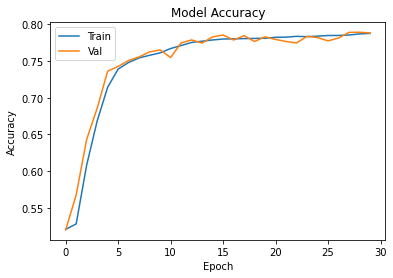

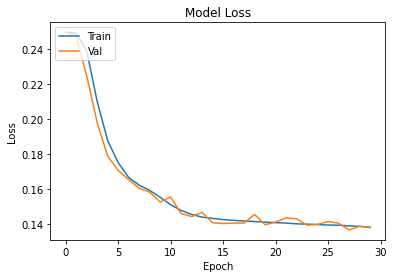

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 79.02%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 67.92%
accuracy: 38.80%
accuracy: 71.25%
accuracy: 47.65%
accuracy: 75.16%
accuracy: 60.48%
accuracy: 57.20%


5-Layer Neural Network Optimized

In [0]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 245721 samples, validate on 61431 samples
Epoch 1/100
245721/245721 [==============================] - 20s 80us/step - loss: 0.1426 - accuracy: 0.7772 - val_loss: 0.1246 - val_accuracy: 0.8067
Epoch 2/100
245721/245721 [==============================] - 19s 77us/step - loss: 0.1280 - accuracy: 0.8035 - val_loss: 0.1215 - val_accuracy: 0.8094
Epoch 3/100
245721/245721 [==============================] - 19s 77us/step - loss: 0.1237 - accuracy: 0.8109 - val_loss: 0.1168 - val_accuracy: 0.8192
Epoch 4/100
245721/245721 [==============================] - 19s 79us/step - loss: 0.1213 - accuracy: 0.8151 - val_loss: 0.1169 - val_accuracy: 0.8164
Epoch 5/100
245721/245721 [==============================] - 19s 77us/step - loss: 0.1198 - accuracy: 0.8179 - val_loss: 0.1147 - val_accuracy: 0.8240
Epoch 6/100
245721/245721 [==============================] - 18s 75us/step - loss: 0.1188 - accuracy: 0.8192 - val_loss: 0.1129 - val_accuracy: 0.8290
Epoch 7/100
245721/245721 [================

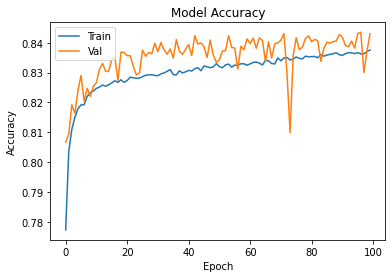

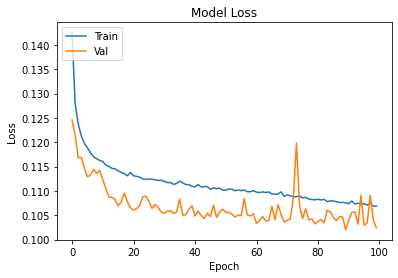

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 84.44%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 79.72%
accuracy: 41.02%
accuracy: 82.84%
accuracy: 65.06%
accuracy: 84.91%
accuracy: 59.65%
accuracy: 30.89%


In [0]:
#6layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(Dense(2))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Train on 245721 samples, validate on 61431 samples
Epoch 1/50
245721/245721 [==============================] - 21s 86us/step - loss: 0.1513 - accuracy: 0.7625 - val_loss: 0.1307 - val_accuracy: 0.7933
Epoch 2/50
245721/245721 [==============================] - 20s 83us/step - loss: 0.1350 - accuracy: 0.7914 - val_loss: 0.1239 - val_accuracy: 0.8095
Epoch 3/50
245721/245721 [==============================] - 21s 87us/step - loss: 0.1306 - accuracy: 0.7993 - val_loss: 0.1256 - val_accuracy: 0.8111
Epoch 4/50
245721/245721 [==============================] - 21s 84us/step - loss: 0.1285 - accuracy: 0.8033 - val_loss: 0.1202 - val_accuracy: 0.8122
Epoch 5/50
245721/245721 [==============================] - 21s 87us/step - loss: 0.1268 - accuracy: 0.8057 - val_loss: 0.1190 - val_accuracy: 0.8146
Epoch 6/50
245721/245721 [==============================] - 21s 84us/step - loss: 0.1258 - accuracy: 0.8067 - val_loss: 0.1177 - val_accuracy: 0.8117
Epoch 7/50
245721/245721 [=======================

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 83.53%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 80.40%
accuracy: 31.91%
accuracy: 81.25%
accuracy: 59.18%
accuracy: 85.67%
accuracy: 53.53%
accuracy: 32.73%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
dt = DecisionTreeClassifier(max_depth=24,max_features=24,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=24, max_features=24, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [0]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 94.84945564411106
Test Prediction Score 91.32037140736303


In [0]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 80.60000000000001
Test Prediction Score 45.20333333333333
Test Prediction Score 81.84
Test Prediction Score 59.31333333333333
Test Prediction Score 84.39999999999999
Test Prediction Score 56.17333333333333
Test Prediction Score 29.549999999999997


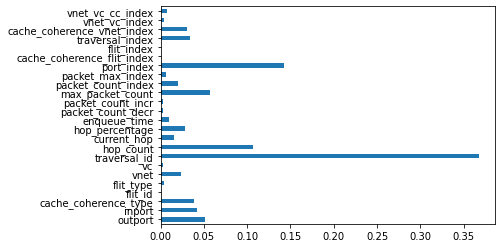

In [0]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

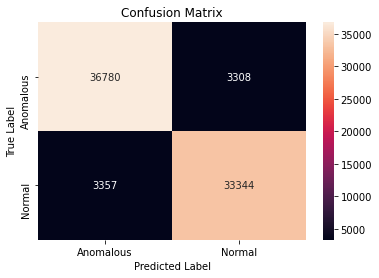

In [0]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     40088
           1       0.91      0.91      0.91     36701

    accuracy                           0.91     76789
   macro avg       0.91      0.91      0.91     76789
weighted avg       0.91      0.91      0.91     76789



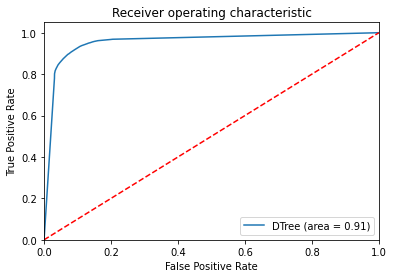

In [0]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf = RandomForestClassifier(max_depth=24,max_features=24,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=24, max_features=24,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [0]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 97.36124133979268
Test Prediction Score 92.79714542447486


In [0]:
y_pred_rf_test= rf.predict(test_X)
rf_score_test = accuracy_score(test_Y,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X1)
rf_score_test = accuracy_score(test_Y1,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X2)
rf_score_test = accuracy_score(test_Y2,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X3)
rf_score_test = accuracy_score(test_Y3,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X4)
rf_score_test = accuracy_score(test_Y4,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X5)
rf_score_test = accuracy_score(test_Y5,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X6)
rf_score_test = accuracy_score(test_Y6,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)

Test Prediction Score 80.36666666666666
Test Prediction Score 45.14333333333334
Test Prediction Score 82.67999999999999
Test Prediction Score 60.35666666666667
Test Prediction Score 84.96000000000001
Test Prediction Score 56.17666666666666
Test Prediction Score 27.339999999999996


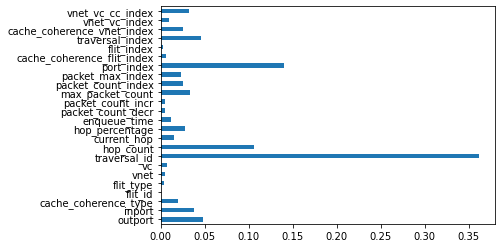

In [0]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

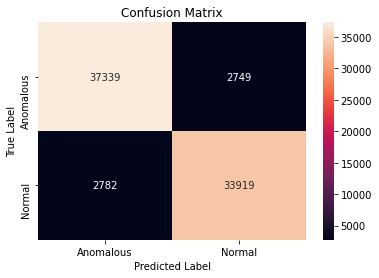

In [0]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     40088
           1       0.93      0.92      0.92     36701

    accuracy                           0.93     76789
   macro avg       0.93      0.93      0.93     76789
weighted avg       0.93      0.93      0.93     76789



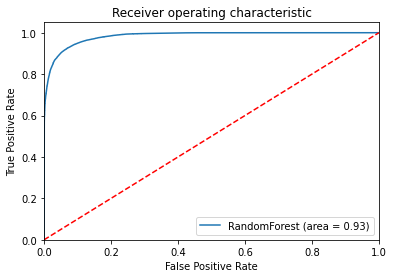

In [0]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [151]:
xgbc = XGBClassifier(max_depth=24,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=24,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [153]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.09165494608533
Test Prediction Score 94.7284116214562


In [154]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 80.39666666666668
Test Prediction Score 45.39666666666667
Test Prediction Score 82.01666666666667
Test Prediction Score 62.99
Test Prediction Score 84.71333333333332
Test Prediction Score 61.44
Test Prediction Score 36.346666666666664


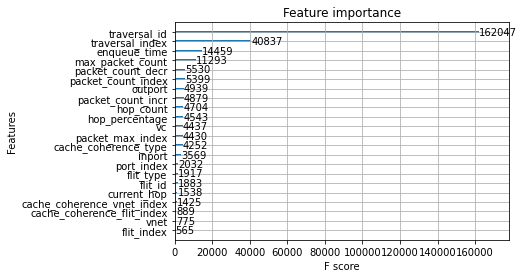

In [155]:
plot_importance(xgbc)
plt.show()

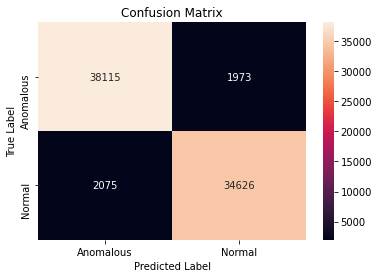

In [156]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [157]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     40088
           1       0.95      0.94      0.94     36701

    accuracy                           0.95     76789
   macro avg       0.95      0.95      0.95     76789
weighted avg       0.95      0.95      0.95     76789



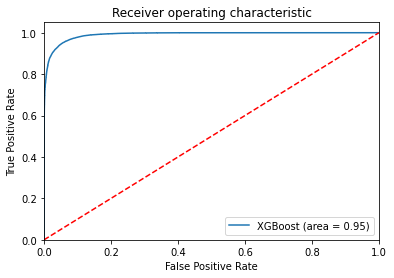

In [158]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [160]:
gbm = lgb.LGBMClassifier(learning_rate = 0.6,  n_estimators = 500, max_depth = 24, random_state=42, min_child_weight=1,metric='binary',boosting_type = 'dart')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.6, max_depth=24,
               metric='binary', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [162]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 89.60742563942283
Test Prediction Score 88.7535975204782


In [163]:
y_pred_gbm_test = gbm.predict(test_X)
gbm_score_test = accuracy_score(test_Y,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X1)
gbm_score_test = accuracy_score(test_Y1,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X2)
gbm_score_test = accuracy_score(test_Y2,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X3)
gbm_score_test = accuracy_score(test_Y3,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X4)
gbm_score_test = accuracy_score(test_Y4,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X5)
gbm_score_test = accuracy_score(test_Y5,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X6)
gbm_score_test = accuracy_score(test_Y6,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)

Test Prediction Score 73.37666666666667
Test Prediction Score 45.49333333333333
Test Prediction Score 72.28999999999999
Test Prediction Score 55.71
Test Prediction Score 79.37333333333333
Test Prediction Score 55.769999999999996
Test Prediction Score 47.22666666666667


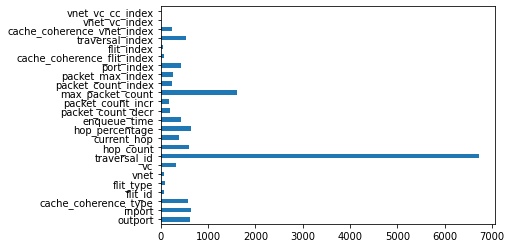

In [164]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

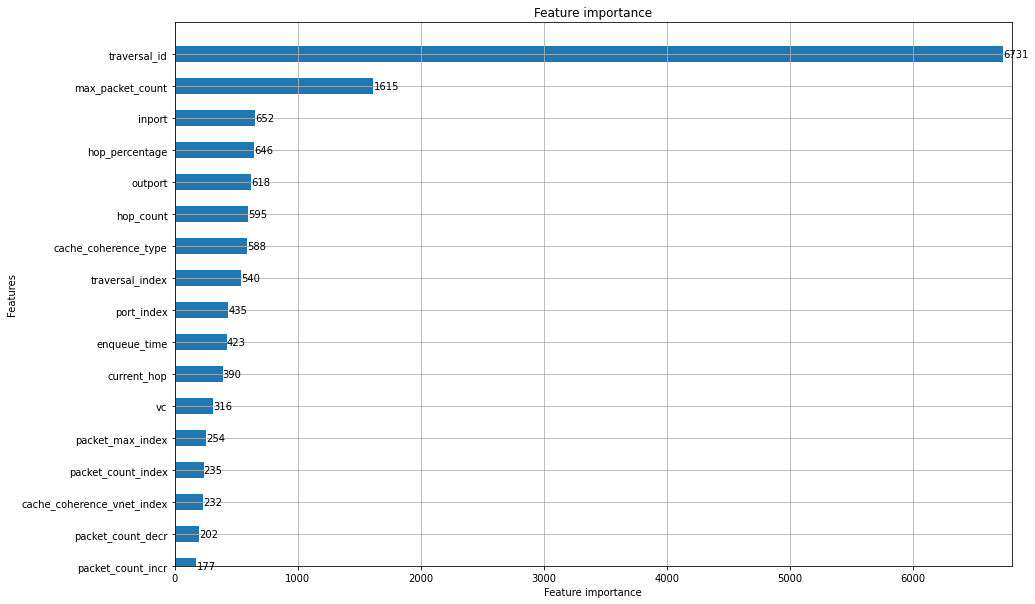

In [165]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,6800), ylim = (0,17), figsize = (15,10))
plt.show()

In [166]:
sorted(gbm.feature_importances_,reverse=True)

[6731,
 1615,
 652,
 646,
 618,
 595,
 588,
 540,
 435,
 423,
 390,
 316,
 254,
 235,
 232,
 202,
 177,
 84,
 80,
 66,
 65,
 55,
 1,
 0]

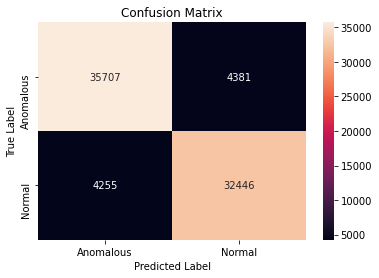

In [167]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [168]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     40088
           1       0.88      0.88      0.88     36701

    accuracy                           0.89     76789
   macro avg       0.89      0.89      0.89     76789
weighted avg       0.89      0.89      0.89     76789



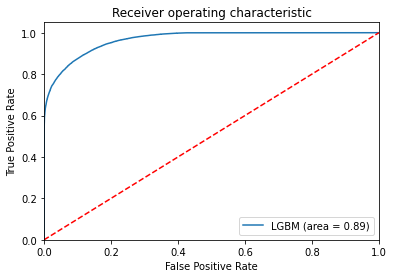

In [170]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()